# SVM

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv('data/GlobalTemperatures.csv')
datac=pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')

In [4]:
data

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [5]:
datac

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [6]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
dt,1750-01-01,1750-02-01,1750-03-01,1750-04-01,1750-05-01,1750-06-01,1750-07-01,1750-08-01,1750-09-01,1750-10-01
LandAverageTemperature,3.034,3.083,5.626,8.49,11.573,12.937,15.868,14.75,11.413,6.367
LandAverageTemperatureUncertainty,3.574,3.702,3.076,2.451,2.072,1.724,1.911,2.231,2.637,2.668
LandMaxTemperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandMaxTemperatureUncertainty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandMinTemperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandMinTemperatureUncertainty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandAndOceanAverageTemperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandAndOceanAverageTemperatureUncertainty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
datac.head(10).T

,0,1,2,3,4,5,6,7,8,9
dt,1743-11-01,1743-12-01,1744-01-01,1744-02-01,1744-03-01,1744-04-01,1744-05-01,1744-06-01,1744-07-01,1744-08-01
AverageTemperature,4.384,NaN,NaN,NaN,NaN,1.53,6.702,11.609,15.342,NaN
AverageTemperatureUncertainty,2.294,NaN,NaN,NaN,NaN,4.68,1.789,1.577,1.41,NaN
Country,Åland,Åland,Åland,Åland,Åland,Åland,Åland,Åland,Åland,Åland


In [8]:
data.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [9]:
datac.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [10]:
datac.groupby(datac.Country).size()

Country
Afghanistan       2106
Africa            1965
Albania           3239
Algeria           2721
American Samoa    1761
                  ... 
Western Sahara    2721
Yemen             1653
Zambia            1965
Zimbabwe          1965
Åland             3239
Length: 243, dtype: int64

In [11]:
data = data[data['LandAverageTemperature'].notna()]
data = data[data['LandAverageTemperatureUncertainty'].notna()]
data = data[data['LandMaxTemperature'].notna()]
data = data[data['LandMaxTemperatureUncertainty'].notna()]
data = data[data['LandMinTemperature'].notna()]
data = data[data['LandMinTemperatureUncertainty'].notna()]
data = data[data['LandAndOceanAverageTemperature'].notna()]
data = data[data['LandAndOceanAverageTemperatureUncertainty'].notna()]

In [12]:
datac = datac[datac['AverageTemperature'].notna()]
datac = datac[datac['AverageTemperatureUncertainty'].notna()]

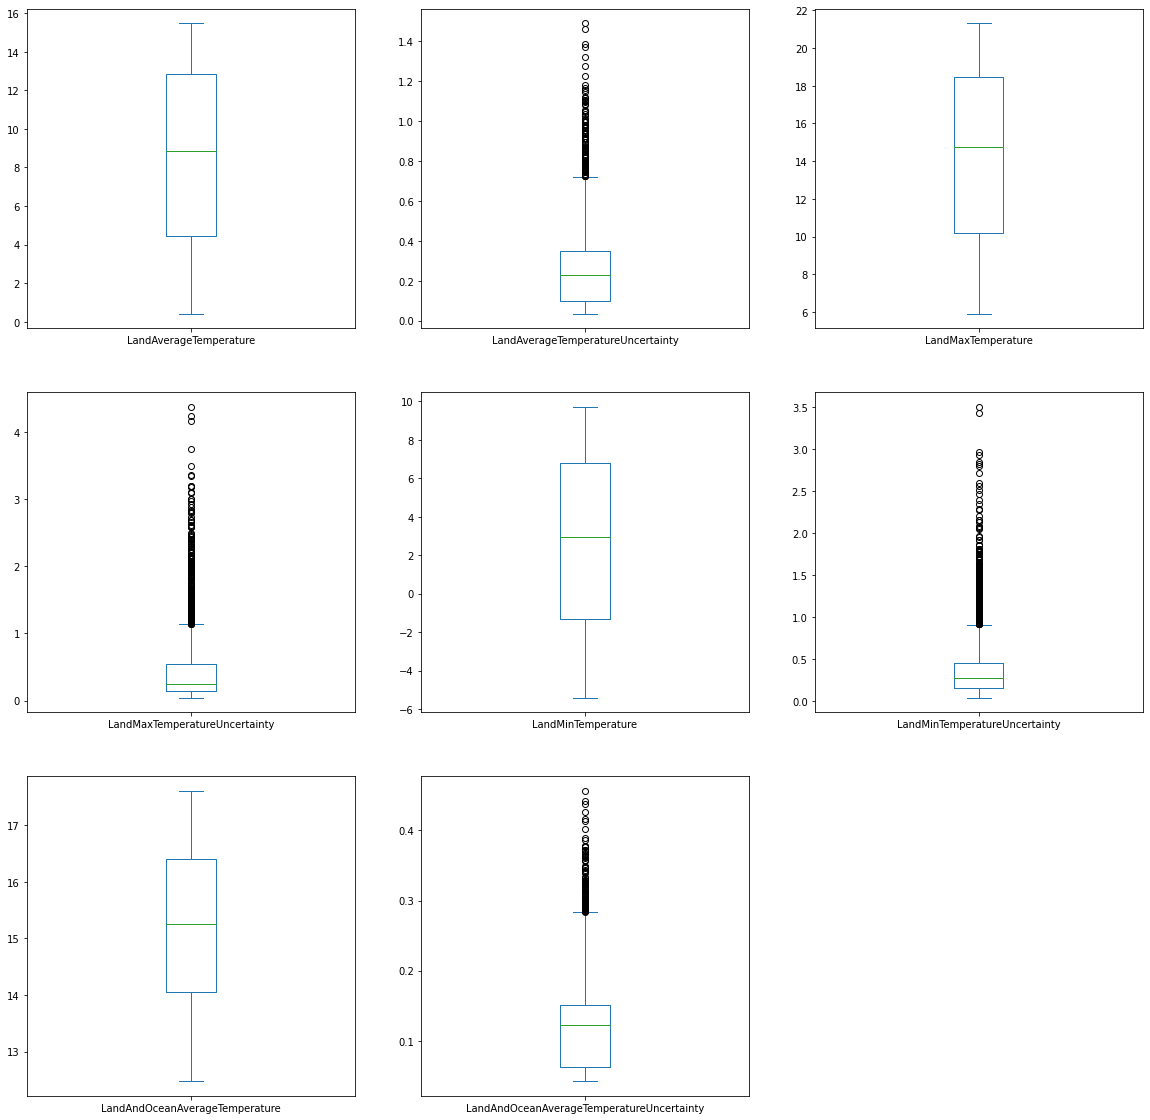

In [13]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,20))
plt.show()

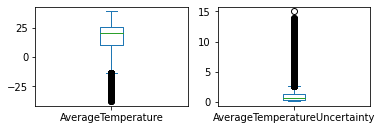

In [14]:
datac.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

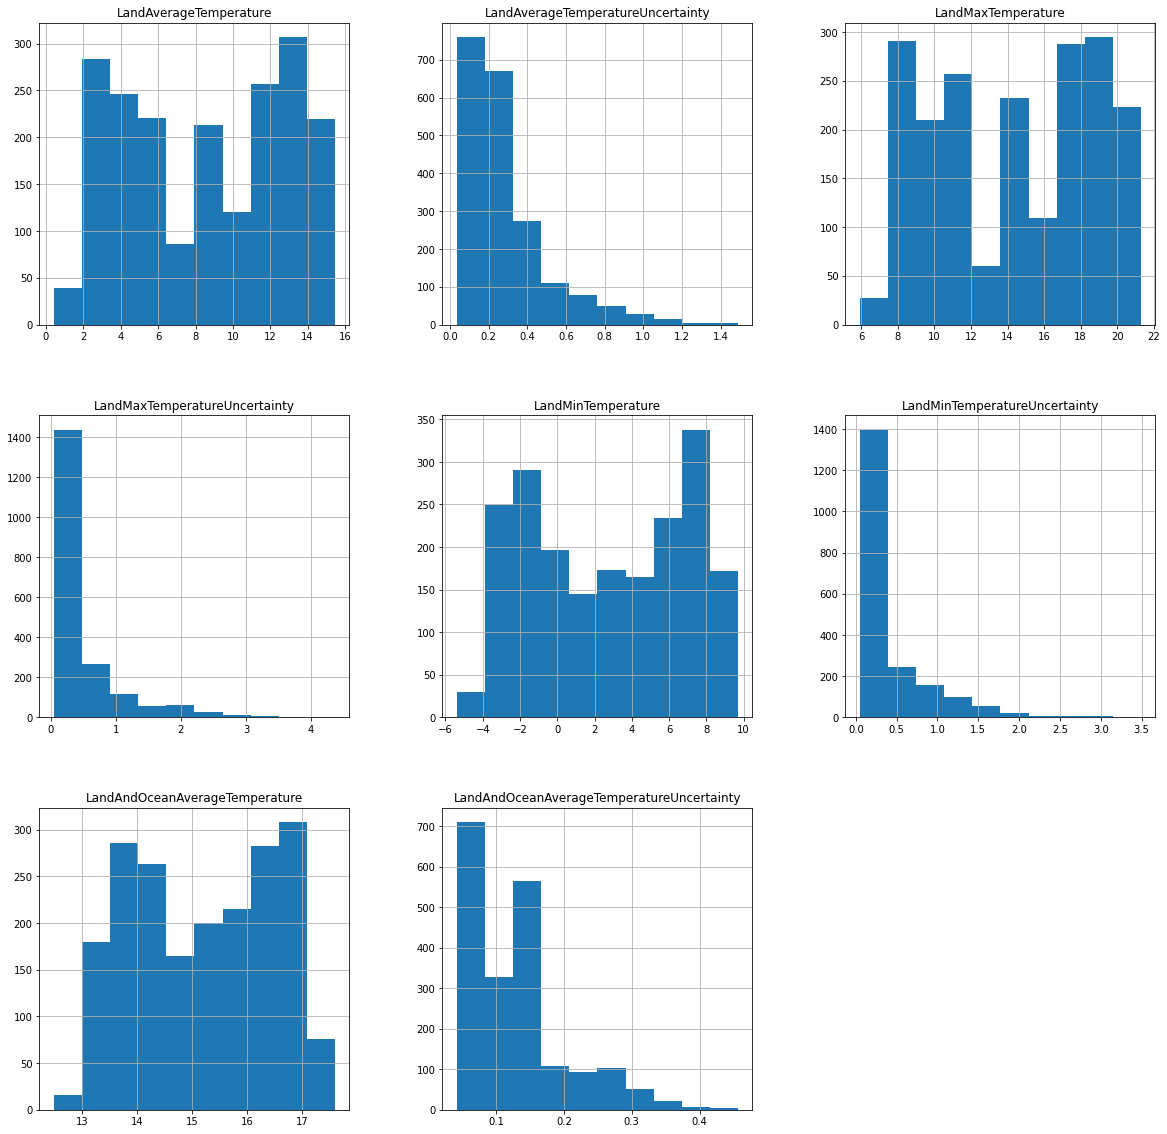

In [15]:
data.hist(figsize=(20,20))
plt.show()

In [16]:
datac = datac.loc[(datac.Country=="Indonesia")|(datac.Country=="China")]
# Cleaning process - Drop the rows in which the average temperature is not available
datac = datac.dropna(subset = ["AverageTemperature"])

In [17]:
datac.head()
datac.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
248567,2013-04-01,26.628,0.222,Indonesia
248568,2013-05-01,26.818,0.154,Indonesia
248569,2013-06-01,26.881,0.248,Indonesia
248570,2013-07-01,25.902,0.164,Indonesia
248571,2013-08-01,25.961,0.319,Indonesia


In [20]:
datac.drop(['dt'], axis=1, inplace=True)

In [21]:
col_names = datac.columns
col_names

Index(['AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [23]:
#getting the season month wise
def get_target(Country):
    if Country=="Indonesia":
        return 1
    else:
        return 0
    
datac['target'] = datac['Country'].apply(get_target)

In [25]:
datac.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,target
110149,16.684,1.978,China,0
110150,13.292,1.555,China,0
110151,5.624,1.383,China,0
110152,-1.981,1.340,China,0
110153,-8.551,1.508,China,0


In [26]:
datac.describe()

,AverageTemperature,AverageTemperatureUncertainty,target
count,4080.000000,4080.000000,4080.000000
mean,15.396021,0.547978,0.460539
std,11.996028,0.418539,0.498502
min,-11.732000,0.058000,0.000000
25%,7.152750,0.226000,0.000000
50%,19.501500,0.403000,0.000000
75%,25.611000,0.757000,1.000000
max,27.478000,2.548000,1.000000


Text(0, 0.5, 'AT Uncrtnty')

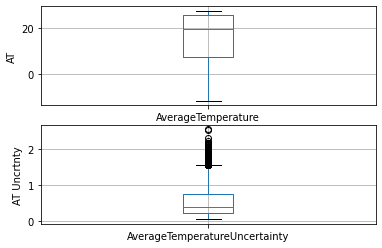

In [27]:
plt.subplot(2, 1, 1)
fig = datac.boxplot(column='AverageTemperature')
fig.set_title('')
fig.set_ylabel('AT')


plt.subplot(2, 1, 2)
fig = datac.boxplot(column='AverageTemperatureUncertainty')
fig.set_title('')
fig.set_ylabel('AT Uncrtnty')

Text(0.5, 0, 'AT - U')

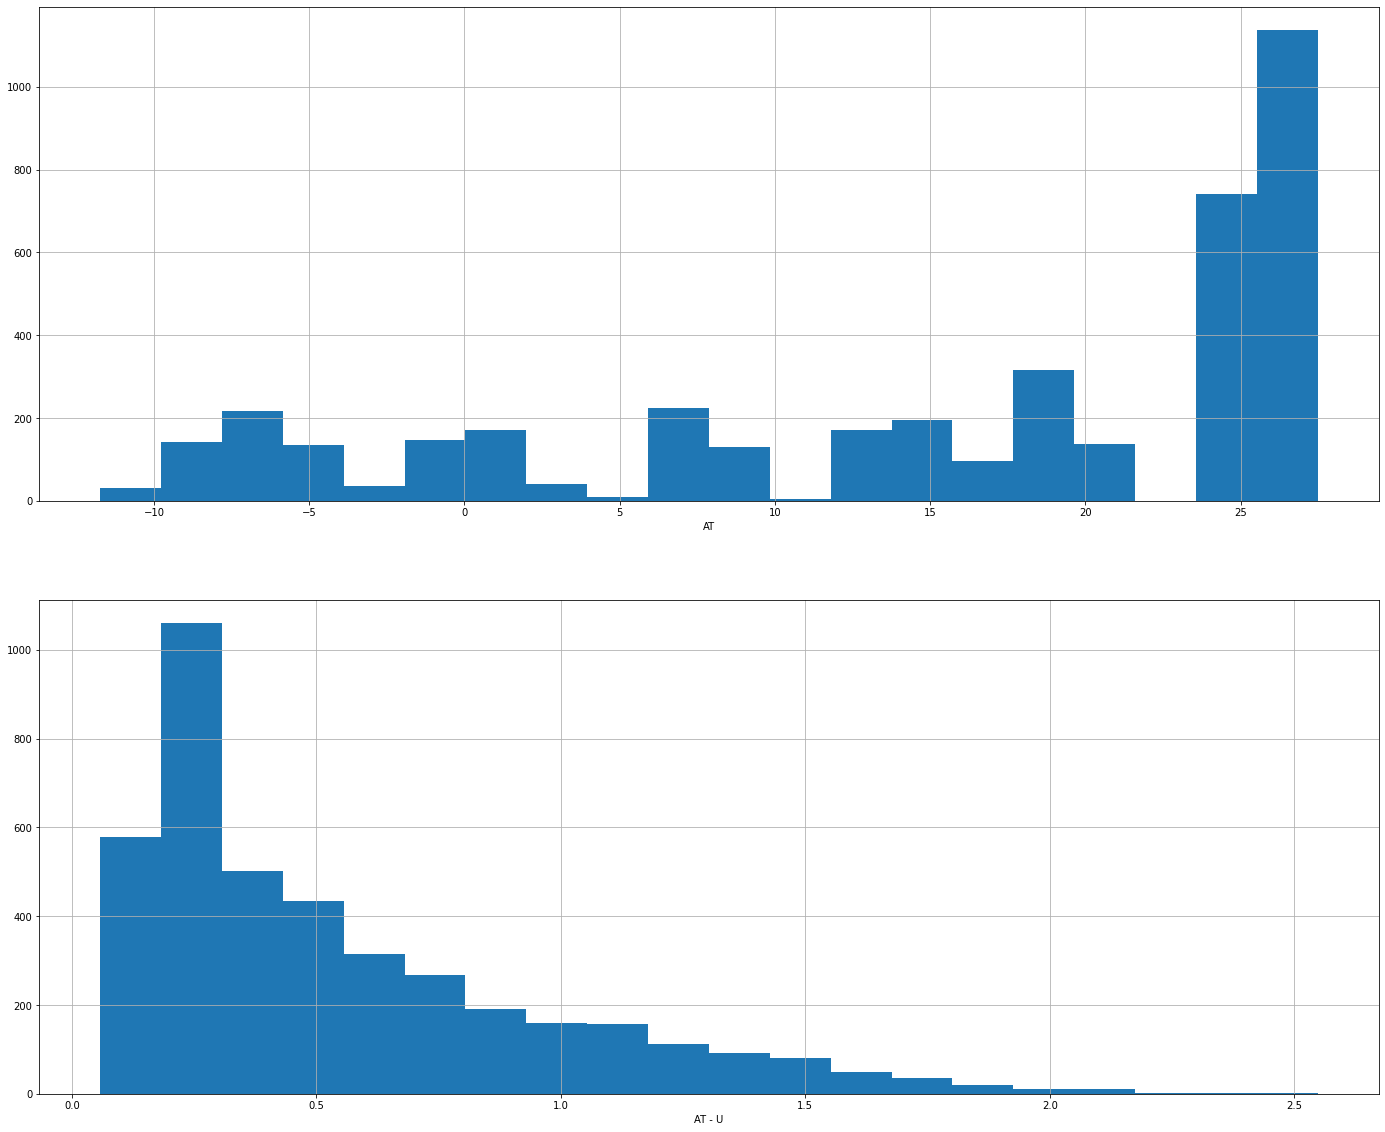

In [28]:
plt.figure(figsize=(24,20))


plt.subplot(2, 1, 1)
fig = datac['AverageTemperature'].hist(bins=20)
fig.set_xlabel('AT')
#fig.set_ylabel('')


plt.subplot(2, 1, 2)
fig = datac['AverageTemperatureUncertainty'].hist(bins=20)
fig.set_xlabel('AT - U')
#fig.set_ylabel('')

In [30]:
X = datac.drop(['target'], axis=1)
X = datac.drop(['Country'],axis=1)

y = datac['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((3264, 3), (816, 3))

In [32]:
cols = X_train.columns

In [36]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [37]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [38]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [39]:
X_train.describe()

,AverageTemperature,AverageTemperatureUncertainty,target
count,3.264000e+03,3.264000e+03,3.264000e+03
mean,9.904931e-17,-1.632681e-17,-5.986497e-18
std,1.000153e+00,1.000153e+00,1.000153e+00
min,-2.276190e+00,-1.145832e+00,-9.307036e-01
25%,-6.883846e-01,-7.688099e-01,-9.307036e-01
50%,3.454343e-01,-3.410346e-01,-9.307036e-01
75%,8.443853e-01,4.794725e-01,1.074456e+00
max,9.791104e-01,4.804354e+00,1.074456e+00


In [40]:
# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000


/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [41]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set

svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 1.0000


/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [42]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 1.0000


/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [43]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 1.0000


/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [44]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0, 1, 1, ..., 0, 1, 1])

In [45]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [46]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [47]:
y_test.value_counts()

0    452
1    364
Name: target, dtype: int64

In [48]:
null_accuracy = (452/(452+364))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5539


In [49]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 1.0000


/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [50]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 1.0000


/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [52]:
 #instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 1.0000


/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [53]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 1.0000


/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/iqbalf/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
